<a id=0></a>
# 10.Classification models
※　分類の機械学習モデル

---
### [1. 探索的データ分析（EDA）、スケーリング](#1)
### [2. Random Forest Classifier](#2)
### [3. KNeighbors Classifier](#3)
### [4. SVC](#4)
### [5. Logistic Regression](#5)
### [6. モデルの評価](#6)
---

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="talk", style="darkgrid", font="HackGen")

---
<a id=1></a>
[Topへ](#0)

---
## 1. 探索的データ分析（EDA)、スケーリング

* 乳がんデータセット
* 相関関係
* 分布、外れ値などの確認
* スケーリング
---

乳がんデータセット

In [93]:
from sklearn.datasets import load_breast_cancer

In [94]:
breast_cancer = load_breast_cancer()

In [95]:
df_X = pd.DataFrame(breast_cancer["data"], columns=breast_cancer["feature_names"])
df_y = pd.DataFrame(breast_cancer["target"], columns=["target"])

In [96]:
df = pd.concat([df_X, df_y], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [97]:
df.shape

(569, 31)

In [98]:
df["target"].unique()
# 二値分類

array([0, 1])

In [99]:
print(breast_cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

相関関係

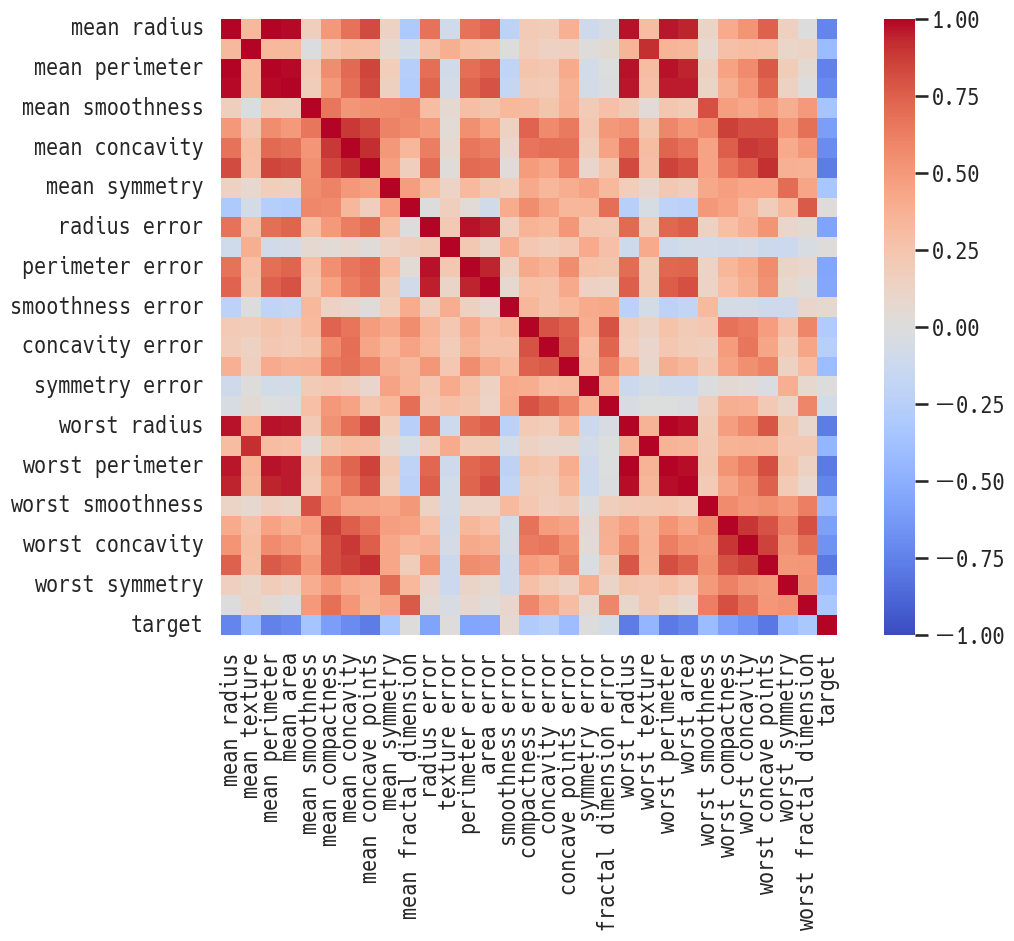

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), square=True, vmin=-1, cmap="coolwarm")
plt.show()
# 似た構造が9つある

In [102]:
# targetとは負の相関。0が悪性
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [103]:
# 特徴量名にmeanかtargetを含む、を使って対象のカラムだけを取り出す
df.columns.str.contains("mean|target")

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True])

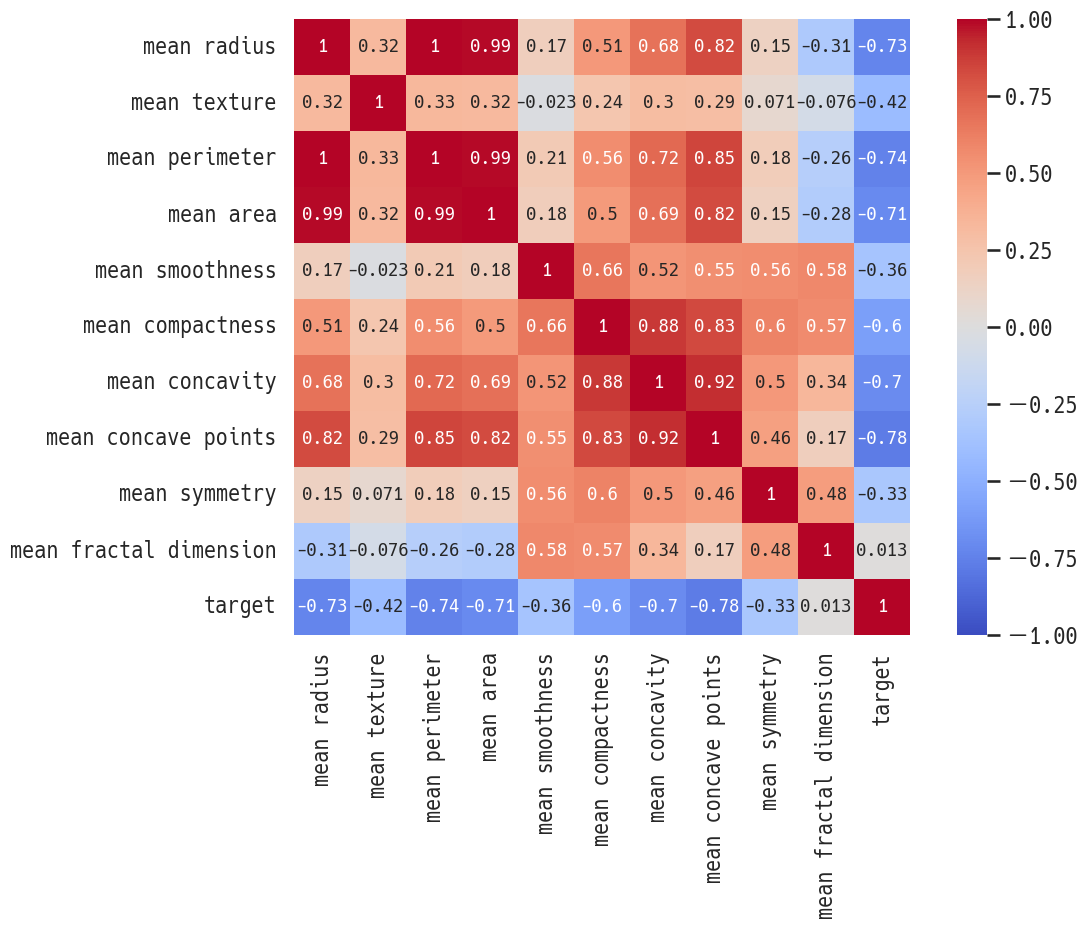

In [104]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.loc[:, df.columns.str.contains("mean|target")].corr(),
    annot=True,
    annot_kws={"size": 14},
    square=True,
    vmin=-1,
    cmap="coolwarm",
)
plt.show()

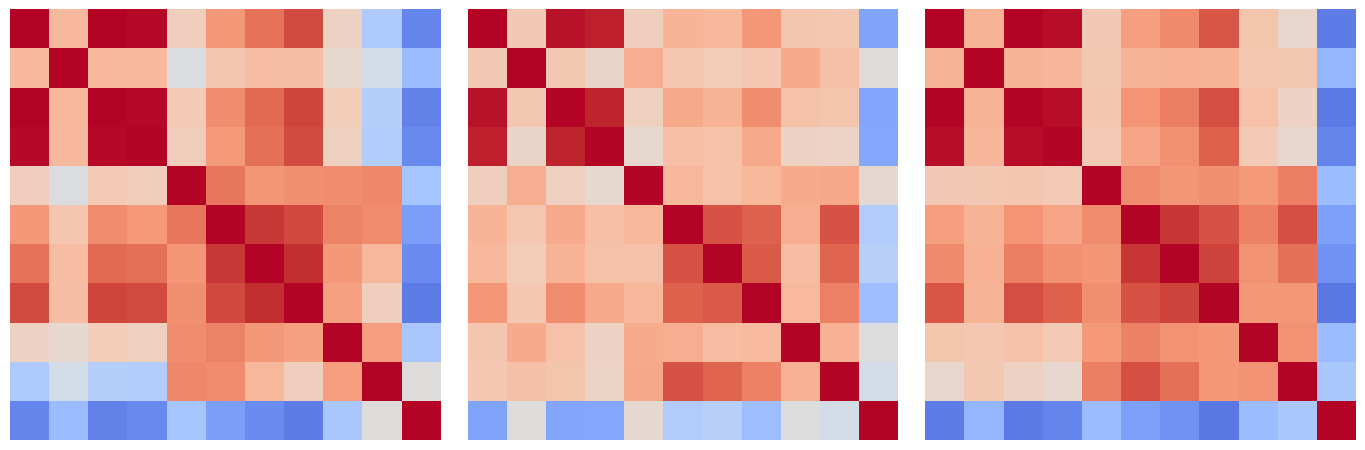

In [105]:
# 三種類を見比べてみる
fig, axes = plt.subplots(1, 3, figsize=(14, 6), tight_layout=True)
sns.heatmap(
    df.loc[:, df.columns.str.contains("mean|target")].corr(),
    xticklabels=False,
    yticklabels=False,
    cbar=False,
    square=True,
    vmin=-1,
    cmap="coolwarm",
    ax=axes[0],
)
sns.heatmap(
    df.loc[:, df.columns.str.contains("error|target")].corr(),
    xticklabels=False,
    yticklabels=False,
    cbar=False,
    square=True,
    vmin=-1,
    cmap="coolwarm",
    ax=axes[1],
)
sns.heatmap(
    df.loc[:, df.columns.str.contains("worst|target")].corr(),
    xticklabels=False,
    yticklabels=False,
    cbar=False,
    square=True,
    vmin=-1,
    cmap="coolwarm",
    ax=axes[2],
)
plt.show()

In [106]:
# 全てが揃っている方が正確な分析ができるかもしれないが、今回はmeanだけを切り出して使用する
df = df.loc[:, df.columns.str.contains("mean|target")]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


分布、外れ値などの確認

In [107]:
def plot_data(feature):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6), tight_layout=True)
    sns.histplot(data=df, y=feature, hue="target", ax=axes[0])  # y=featureとして向きをそろえる
    sns.boxplot(data=df, x="target", y=feature, width=0.8, ax=axes[1])
    sns.swarmplot(data=df, x="target", y=feature, alpha=0.8, size=3, ax=axes[2])
    plt.suptitle(feature)
    plt.show()

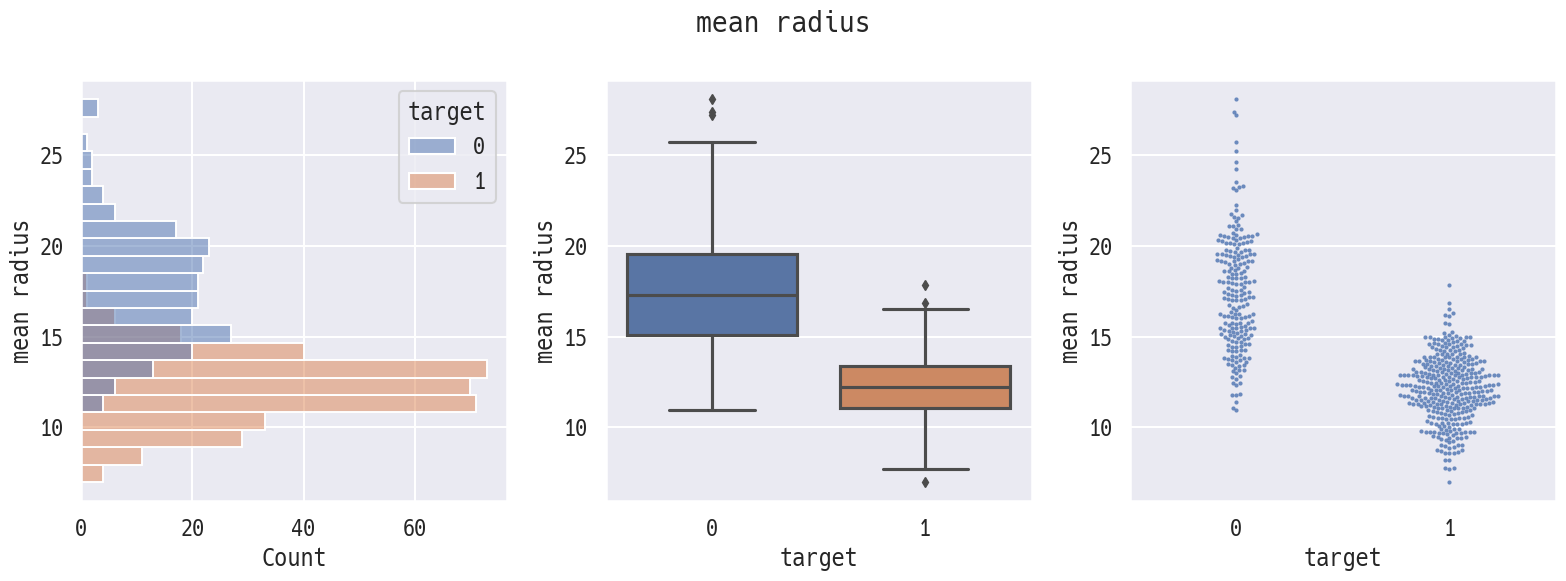

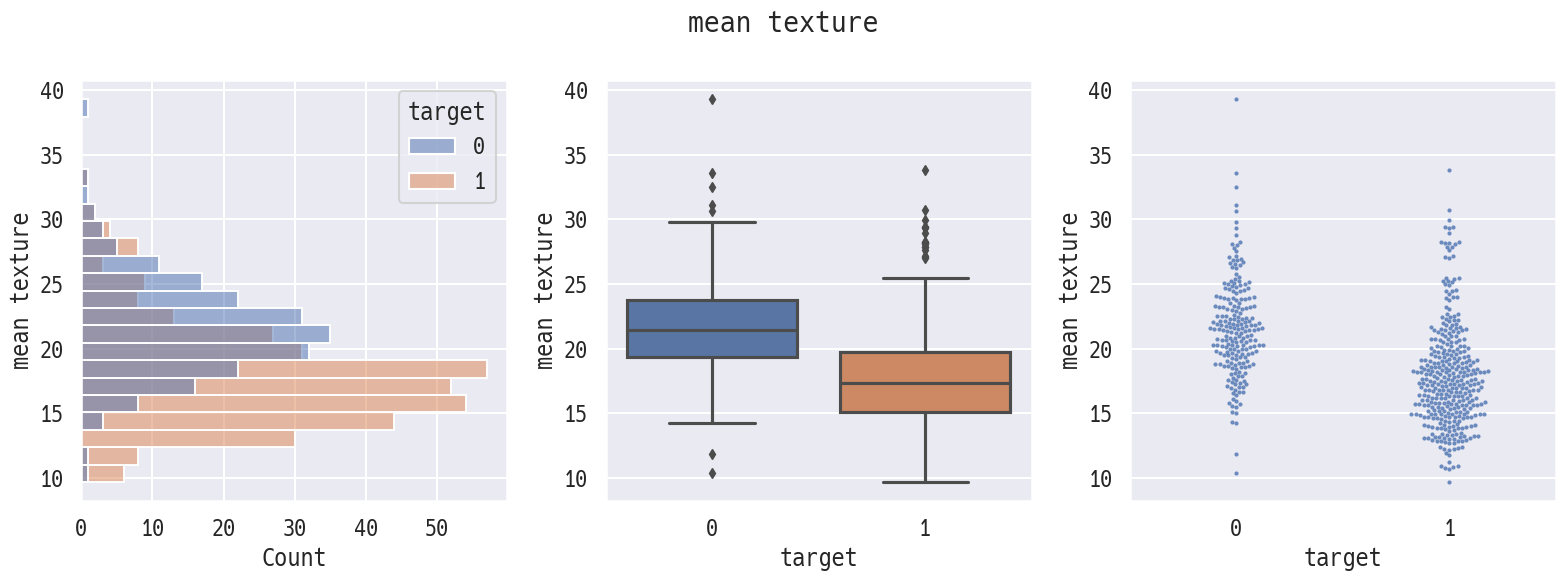

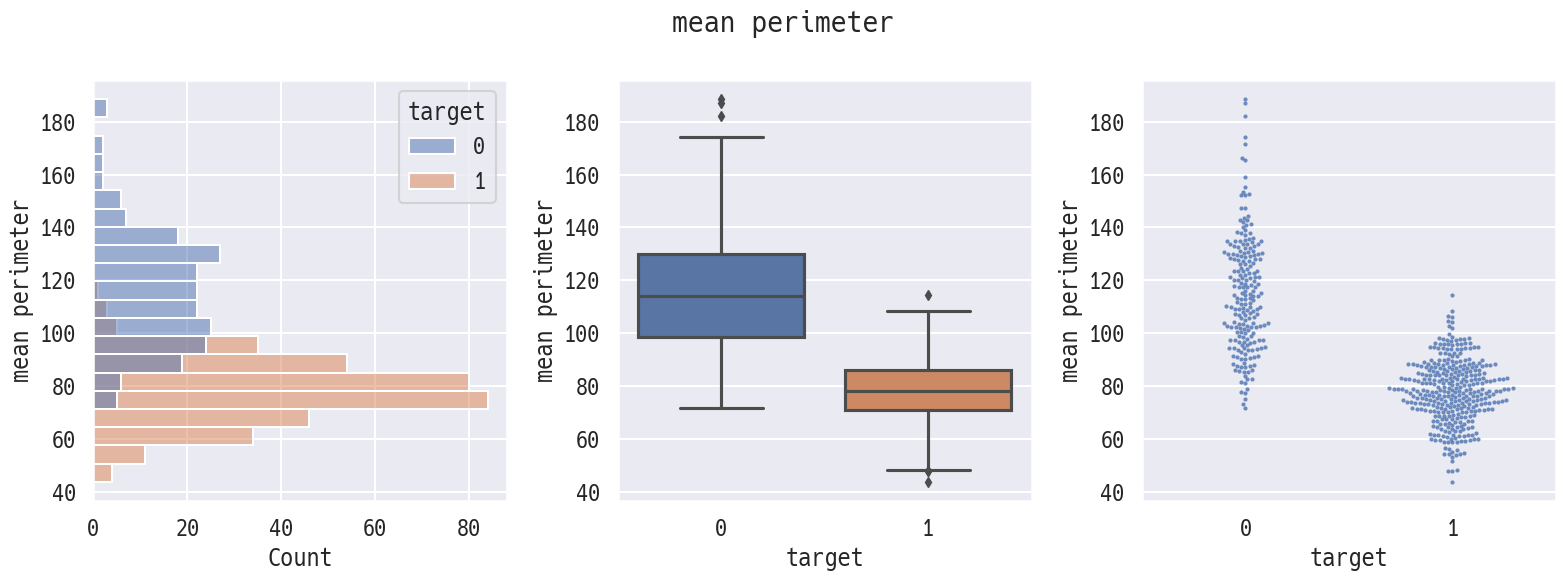

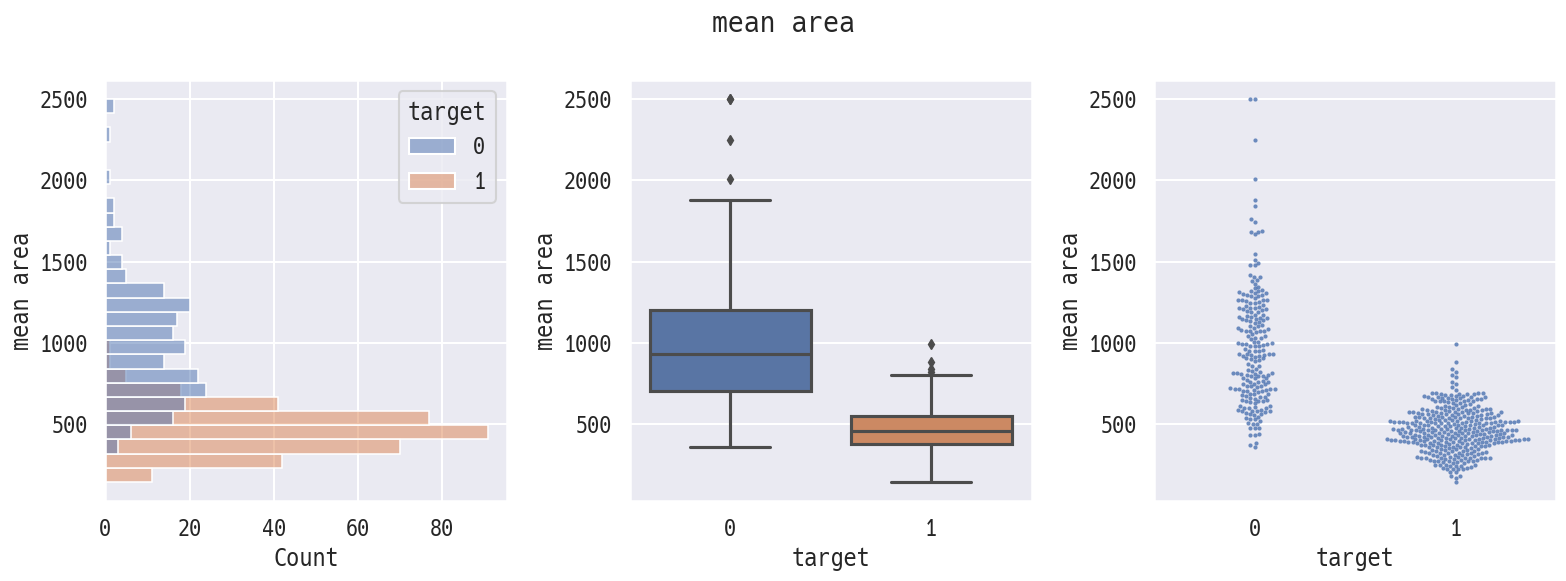

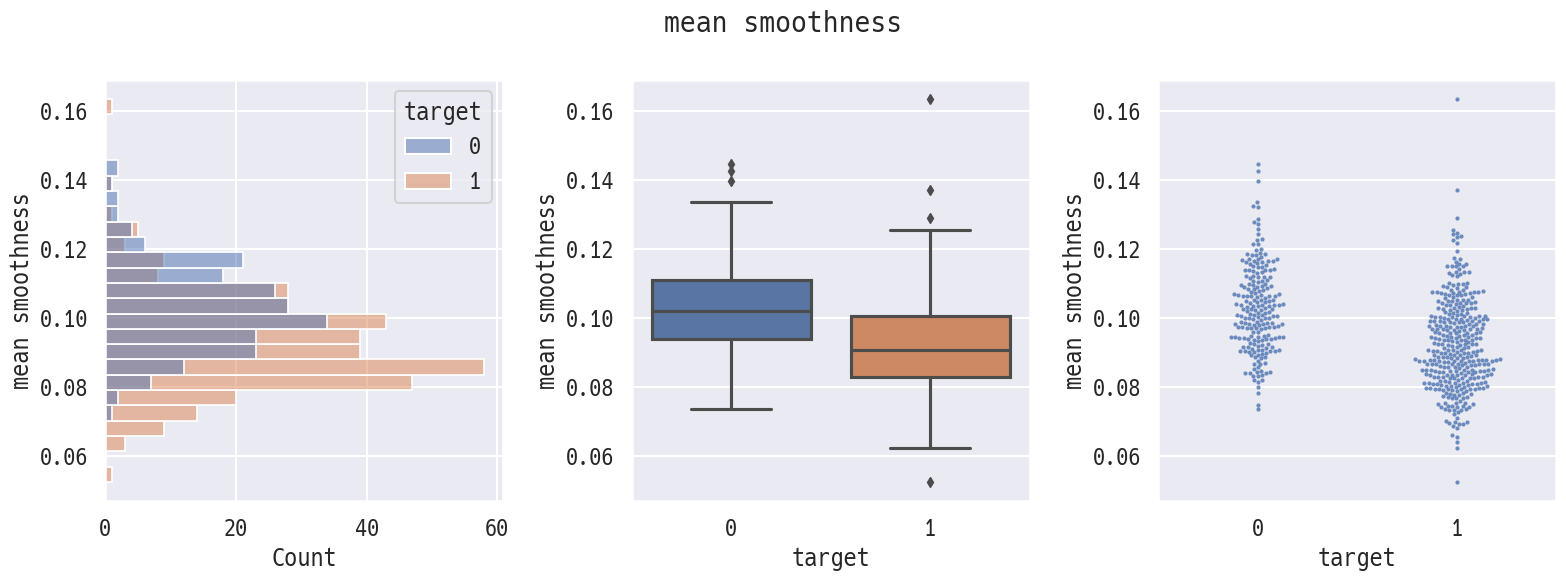

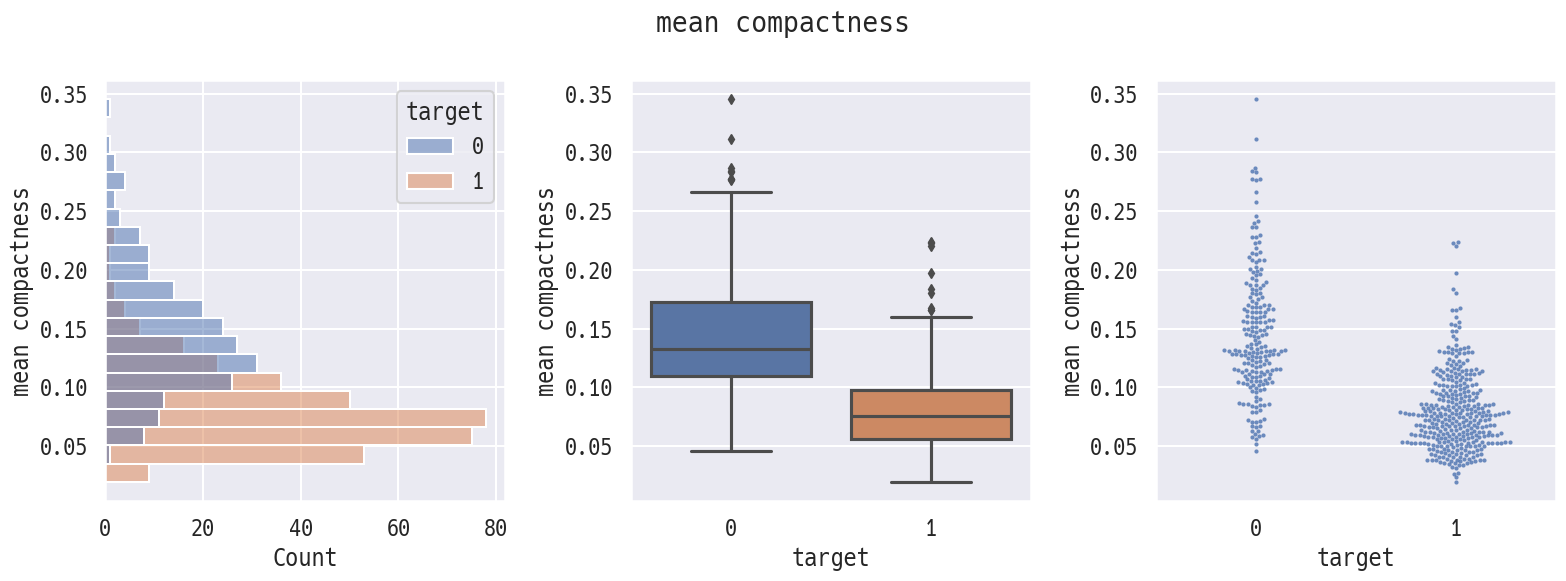

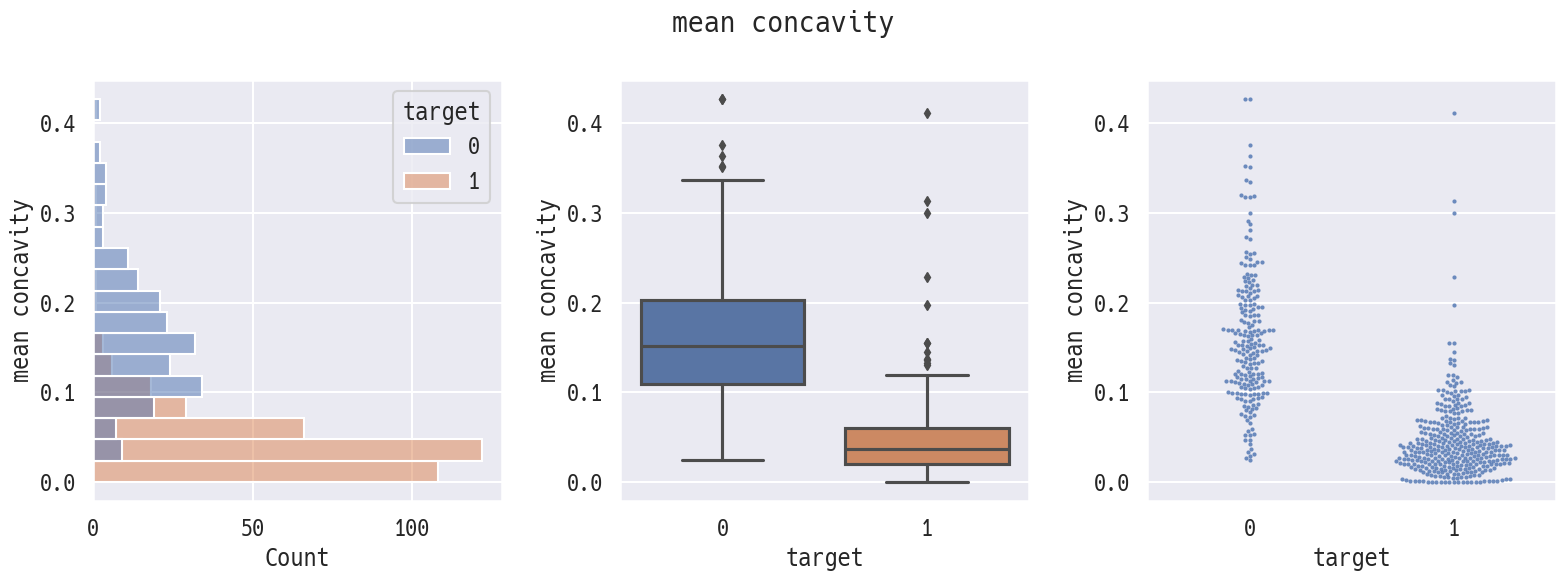

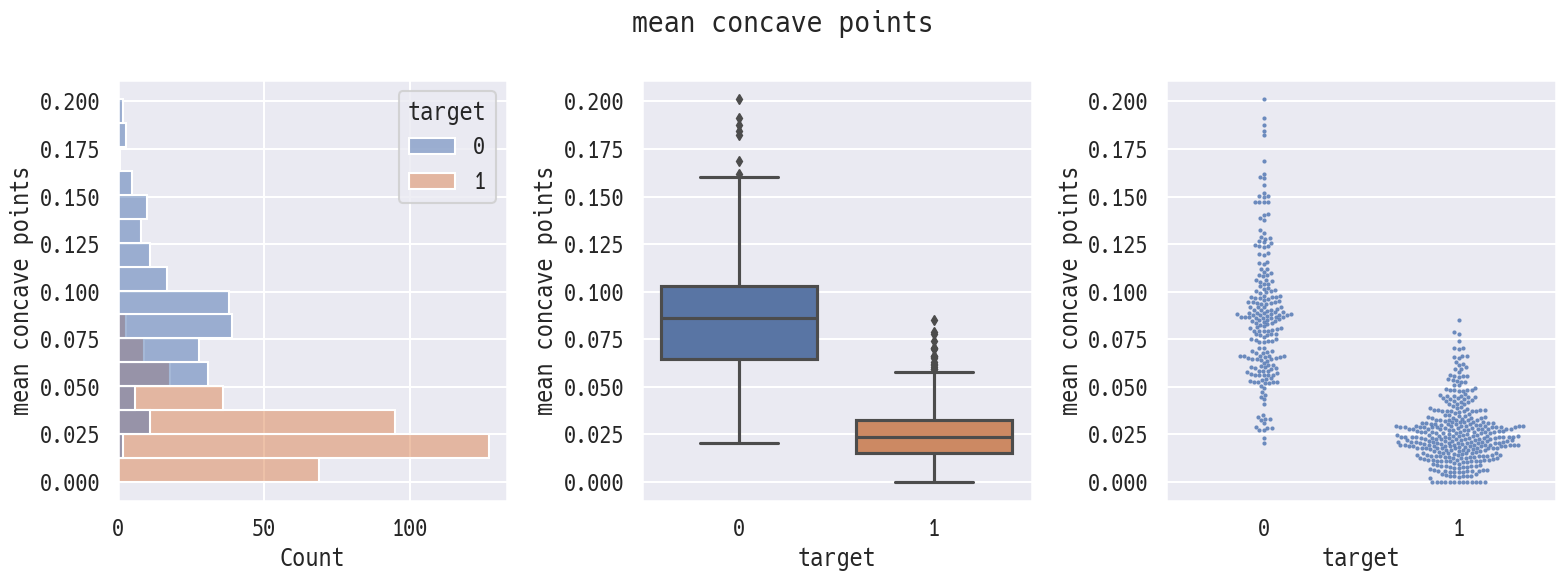

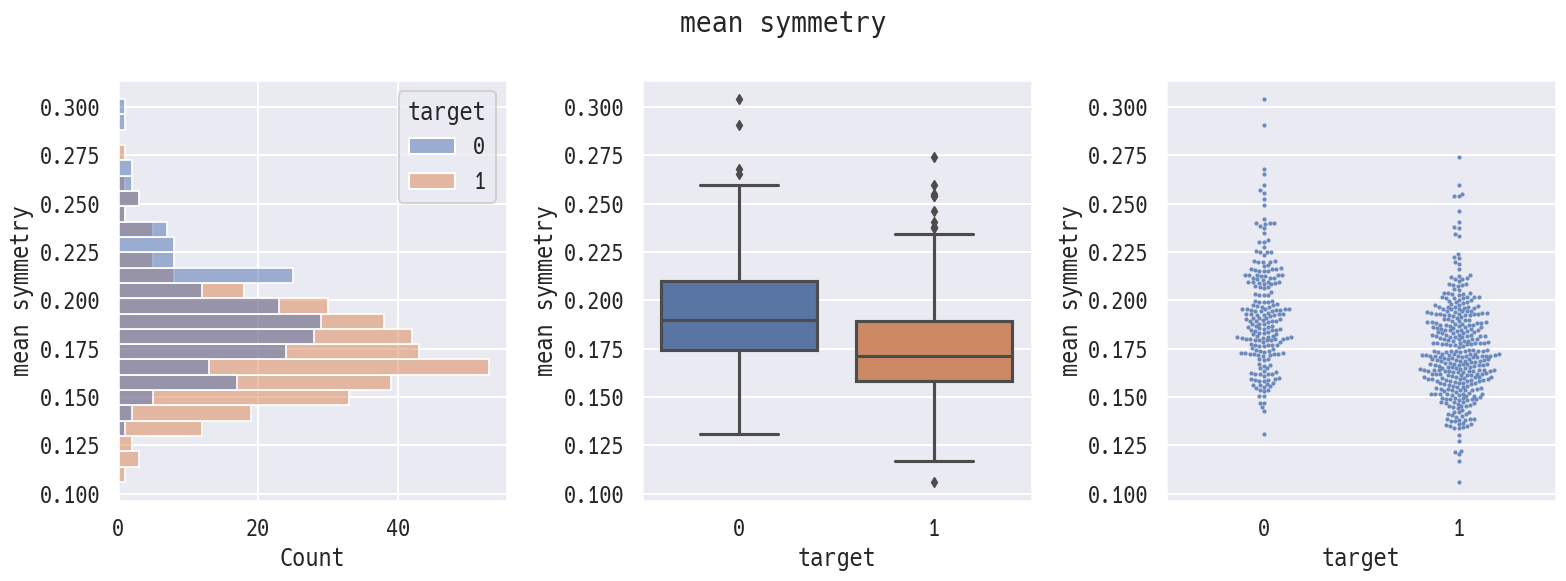

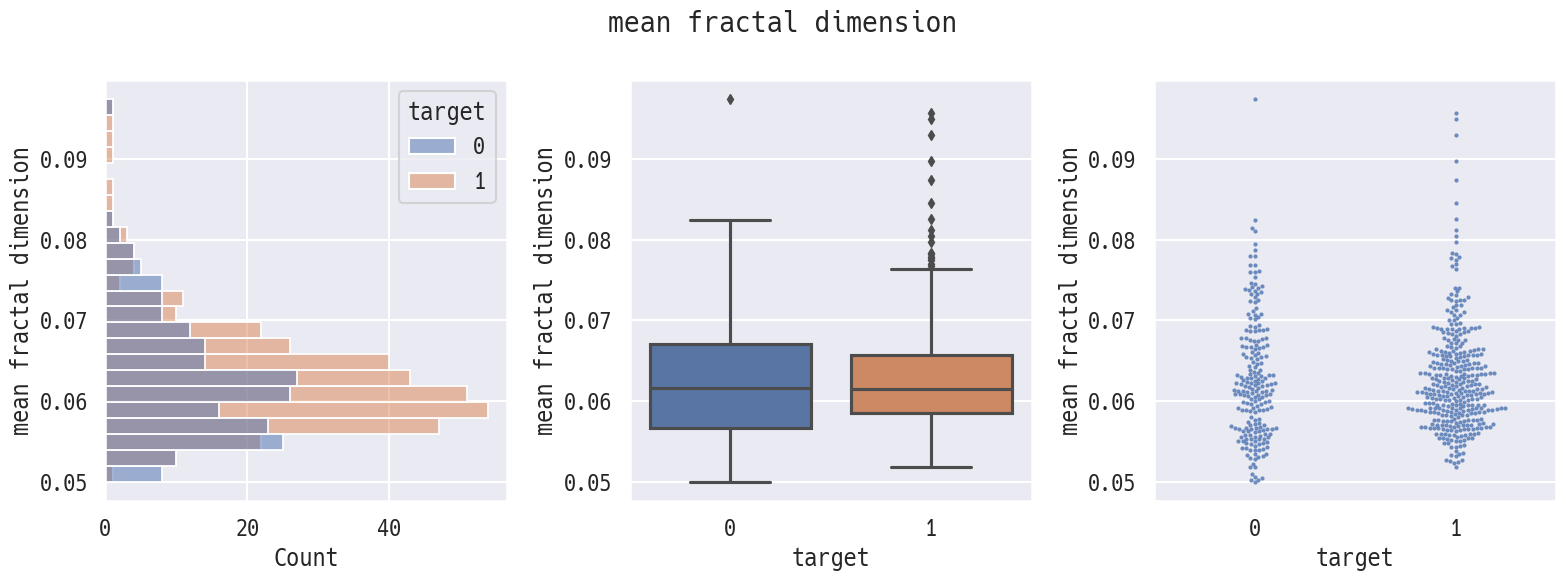

In [108]:
for feature in df.columns[:-1]:
    plot_data(feature)

スケーリング

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# stratify:階層化、trainとtestの中でのｙのクラスの割合を一定にする
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1],
    df.iloc[:, -1],
    test_size=0.3,
    random_state=17,
    stratify=df.iloc[:, -1],
)

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [112]:
scaler.fit(X_train)

StandardScaler()

In [113]:
X_train_scaled = scaler.transform(X_train)

In [114]:
# testデータに対してもtrainデータで使ったスケーラーを用いる
X_test_scaled = scaler.transform(X_test)

In [115]:
# 1の割合を調べると、ほぼ同じ比率になっている(stratify)
y_train.sum() / len(y_train), y_test.sum() / len(y_test)

(0.628140703517588, 0.6257309941520468)

---
<a id=2></a>
[Topへ](#0)

---
## 2. RandomForestClassifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* モデルインスタンスの作成
* モデルの構築・属性・予測・スコア
* 予想された確率
* confusion matrix（混同行列）
* precision（適合率）、 recall（再現率）、f1_score（F1値）
---

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True, random_state=None, max_samples=None

モデルのインポート

In [116]:
from sklearn.ensemble import RandomForestClassifier

モデルインスタンスの作成

In [117]:
rf_model = RandomForestClassifier(random_state=17)

モデルの構築・属性・予測・スコア

In [118]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=17)

In [119]:
rf_pred = rf_model.predict(X_test_scaled)

In [120]:
rf_pred[:5]

array([1, 1, 1, 0, 0])

In [121]:
# 分類モデルのスコアは正解の割合
rf_model.score(X_test_scaled, y_test)

0.9473684210526315

In [122]:
rf_model.score(X_train_scaled, y_train)

1.0

予想された確率

In [123]:
# 0である確率、1である確率
prob = rf_model.predict_proba(X_test_scaled)
prob[:10]

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.18, 0.82],
       [0.17, 0.83],
       [1.  , 0.  ],
       [0.58, 0.42],
       [0.  , 1.  ]])

confusion matrix（混同行列）

In [124]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
)

In [125]:
confusion_matrix(y_test, rf_pred)

array([[ 60,   4],
       [  5, 102]])

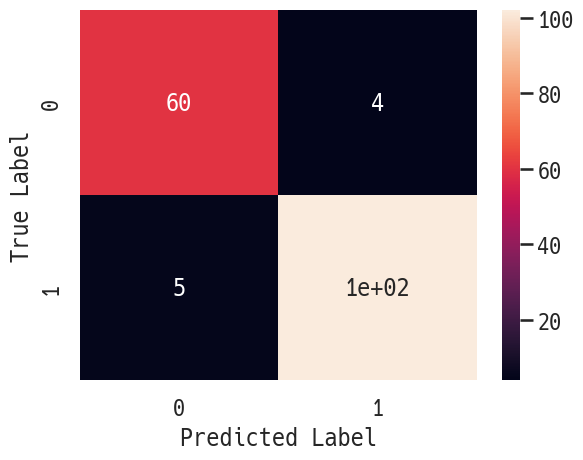

In [126]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [127]:
162 / 171

0.9473684210526315

precision（適合率）、 recall（再現率）、f1_score（F1値）

In [128]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [129]:
60 / 65, 102 / 106, 60 / 64, 102 / 107

(0.9230769230769231, 0.9622641509433962, 0.9375, 0.9532710280373832)

調和平均
$$\frac{1}{\frac{(1/x + 1/y)}2}=\frac{2xy}{(x + y)}$$
速度や濃度計算でよく用いられる平均の計算

(各データの逆数)の算術平均)の逆数

In [130]:
# 適合率、ポジティブの予想がどれだけ合っているか  TP / (TP + FP)
pre = precision_score(y_test, rf_pred)  # 'macro', 'weighted', None
pre

0.9622641509433962

In [131]:
# 再現率、実際と予想がどれだけ合っているか　TP / (TP + FN)
rec = recall_score(y_test, rf_pred)
rec

0.9532710280373832

In [132]:
f1_score(y_test, rf_pred)

0.9577464788732395

In [133]:
2 * pre * rec / (pre + rec)

0.9577464788732395

In [134]:
# スケーリングしていない場合
rf_model_new = RandomForestClassifier(random_state=17)
rf_model_new.fit(X_train, y_train)
rf_pred_new = rf_model_new.predict(X_test)
print(classification_report(y_test, rf_pred_new))
# あるひとつの特徴量の値で分岐させていくため、特徴量間のスケールの差はほとんど影響しない

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        64
           1       0.96      0.95      0.96       107

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



---
<a id=3></a>
[Topへ](#0)

---
## 3. KNeighbors Classifier

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

n_neighbors=5, weights='uniform'

モデルのインポート

In [135]:
from sklearn.neighbors import KNeighborsClassifier

モデルインスタンスの作成

In [136]:
# pを指定することで、範囲を示す形状が変化する
kn_model = KNeighborsClassifier(n_neighbors=5, weights="uniform")

モデルの構築・予測・スコア

In [137]:
kn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [138]:
kn_pred = kn_model.predict(X_test_scaled)
kn_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [139]:
kn_model.score(X_test_scaled, y_test)

0.9649122807017544

In [140]:
kn_model.score(X_train_scaled, y_train)

0.9472361809045227

confusion matrix（混同行列）

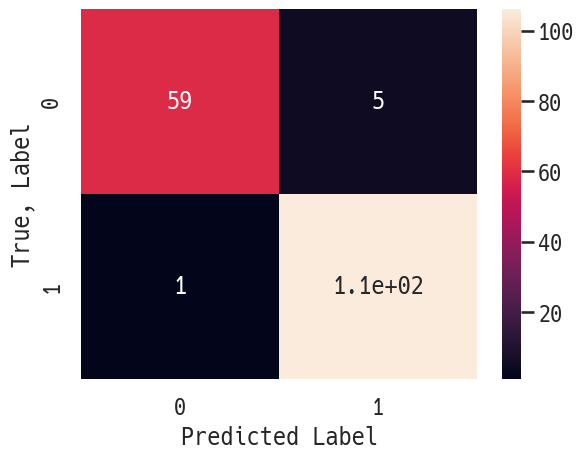

In [141]:
sns.heatmap(confusion_matrix(y_test, kn_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True, Label")
plt.show()

In [142]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [143]:
# スケーリングしていない場合
kn_model_new = KNeighborsClassifier()
kn_model_new.fit(X_train, y_train)
kn_pred_new = kn_model_new.predict(X_test)
print(classification_report(y_test, kn_pred_new))
# k近傍座標分類では、座標の距離が重要な材料になるため、スケーリングをしていない場合は影響を受ける

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        64
           1       0.89      0.95      0.92       107

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



---
<a id=4></a>
[Topへ](#0)

---
## 4. SVC

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, gamma='scale', random_state=None

モデルのインポート

In [144]:
from sklearn.svm import SVC

モデルインスタンスの作成

In [145]:
svc_model = SVC(random_state=17)
# パラメーターcで正則化（過学習などを防ぐため罰則を付けて調整する）を用いることもできる

モデルの構築・予測・スコア

In [146]:
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=17)

In [147]:
svc_pred = svc_model.predict(X_test_scaled)
svc_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [148]:
svc_model.score(X_test_scaled, y_test)

0.9532163742690059

In [149]:
svc_model.score(X_train_scaled, y_train)

0.9597989949748744

confusion matrix（混同行列）

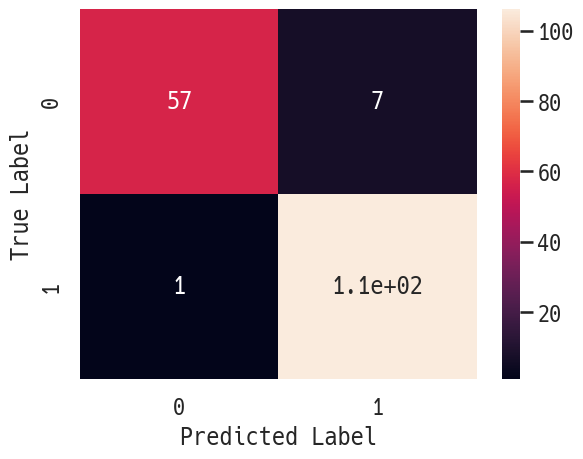

In [150]:
sns.heatmap(confusion_matrix(y_test, svc_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 右上はTrue negative(偽陽性)→Falseのものを誤ってTrueと認識
# 左下はFalse negative(偽陰性)→Trueのものを誤ってFalseと認識

In [151]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [152]:
# スケーリングしていない場合
svc_model_new = SVC()
svc_model_new.fit(X_train, y_train)
svc_pred_new = svc_model_new.predict(X_test)
print(classification_report(y_test, svc_pred_new))
# このSVCモデルでも空間、領域を使うためスケーリングしないデータではスコアが下がっている

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



---
<a id=5></a>
[Topへ](#0)

---
## 5. Logistic Regression

* モデルのインポート  
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* モデルインスタンスの作成
* モデルの構築・予測・スコア
* confusion matrix（混同行列）
---

C=1.0, random_state=None, max_iter=100

モデルのインポート

In [153]:
# ロジスティック回帰→

from sklearn.linear_model import LogisticRegression

モデルインスタンスの作成

In [154]:
log_model = LogisticRegression(random_state=17)  # max_iter=150

モデルの構築・予測・スコア

In [155]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=17)

In [156]:
log_pred = log_model.predict(X_test_scaled)
log_pred[:10]

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [157]:
log_model.score(X_test_scaled, y_test)

0.9532163742690059

In [158]:
log_model.score(X_train_scaled, y_train)

0.9371859296482412

confusion matrix（混同行列）

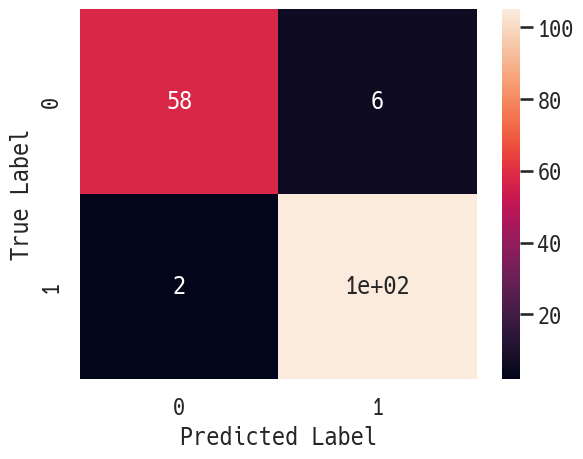

In [159]:
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [161]:
log_model_new = LogisticRegression(max_iter=150, random_state=17)
log_model_new.fit(X_train, y_train)
log_pred_new = log_model_new.predict(X_test)
print(classification_report(y_test, log_pred_new))
# スケーリングはほぼ影響を与えない。スケーリングしない方がわずかに結果がよくなっている

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        64
           1       0.96      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



---
<a id=6></a>
[Topへ](#0)

---
## 6. モデルの評価

* precision_recall_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html  
* f1_score, precision, recall
* roc_curve  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html  
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.htm  
---

precision_recall_curve

In [162]:
# モデルとしてSVCを用いる
model = SVC(probability=True)  # SVCで確率を取得したい場合はprobability=Trueを設定する
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85        64
           1       0.87      0.99      0.93       107

    accuracy                           0.90       171
   macro avg       0.92      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [163]:
prob = model.predict_proba(X_test)
prob[:10]
# 右が1、陽性である確率

array([[0.13941964, 0.86058036],
       [0.0830793 , 0.9169207 ],
       [0.0852441 , 0.9147559 ],
       [0.13215998, 0.86784002],
       [0.96414736, 0.03585264],
       [0.08972104, 0.91027896],
       [0.17992863, 0.82007137],
       [0.60838333, 0.39161667],
       [0.38954099, 0.61045901],
       [0.0811409 , 0.9188591 ]])

In [164]:
from sklearn.metrics import precision_recall_curve

In [165]:
# precision_recall_curve(y_test, prob[:, 1])

In [166]:
precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])
# 陽性の確率を元に考えていく
# recall → 検出率

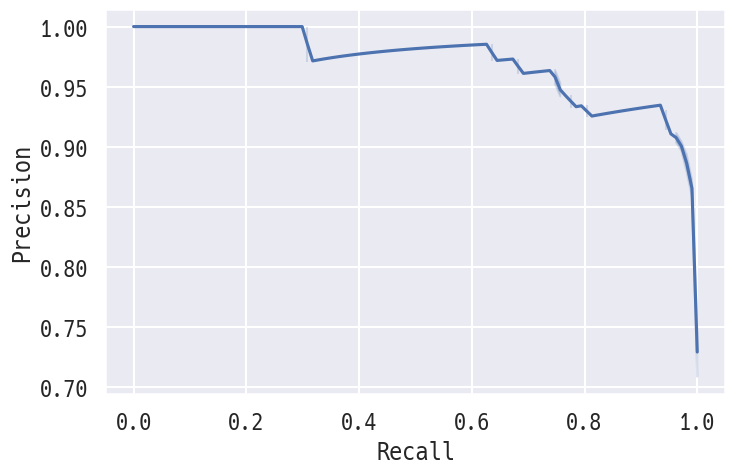

In [167]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=recall, y=precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
# 適合率、ポジティブの予想がどれだけ合っているか  TP / (TP + FP)
# 再現率、実際と予想がどれだけ合っているか　TP / (TP + FN)

# 閾値が1に近い => ほぼすべてネガティブに分類される。FP=0、precisionは1になる。TP自体も0個になるとすればRecallは0に近づく。
# 閾値が0に近い => ほぼすべてポジティブに分類される。FN=0、recallは1になる。precisionはTP÷全サンプル数の値に近づく（今回は0.63程度）。ただし、閾値は0.345を最低としているため、上記の値で留まっている

f1_score, precision, recall

In [168]:
# precision, recallからf1スコアを計算
f1_scores = []
for p, r in zip(precision, recall):
    score = 2 * p * r / (p + r)
    f1_scores.append(score)
f1_scores[:5]

[0.7697841726618705,
 0.7725631768953068,
 0.7753623188405798,
 0.7781818181818182,
 0.781021897810219]

In [169]:
# precision, recall, threshold = precision_recall_curve(y_test, prob[:, 1])で取得した要素数が異なることに注意
len(threshold), len(f1_scores)

(171, 172)

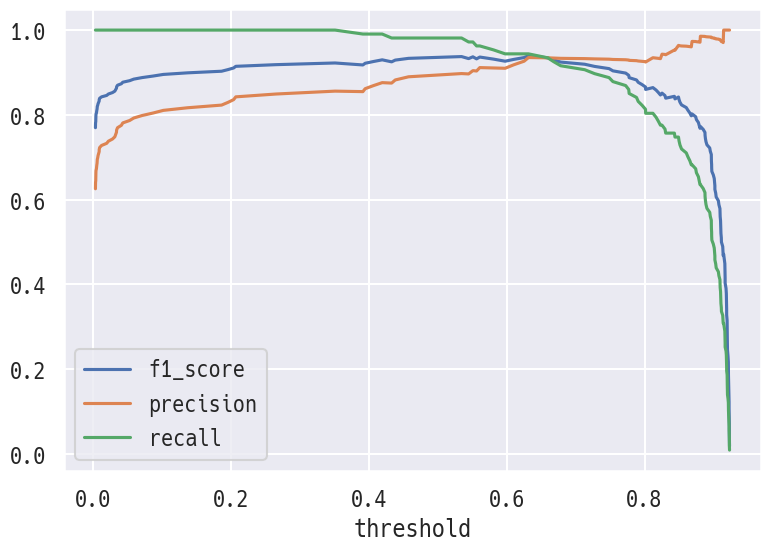

In [170]:
plt.figure(figsize=(9, 6))
sns.lineplot(x=threshold, y=f1_scores[:-1], label="f1_score")  # 最終インデックスの手前までにする
sns.lineplot(x=threshold, y=precision[:-1], label="precision")
sns.lineplot(x=threshold, y=recall[:-1], label="recall")
plt.xlabel("threshold")
plt.legend()
plt.show()

In [171]:
np.max(f1_scores)

0.9395348837209302

In [179]:
# 最大値のインデックスを取得
np.argmax(f1_scores)

63

In [178]:
# f1スコアが最大となる時のprecision, recall, threshold
precision[63], recall[63], threshold[63]

(0.9351851851851852, 0.9439252336448598, 0.6317710503896633)

In [180]:
# np.whereを用いて改めて0,1の予測アレイを作成
pred_new = np.where(
    prob[:, 1] >= threshold[63], 1, 0
)  # threshold=threshold[17]の時にf1スコアが最大になる

In [181]:
f1_score(y_test, pred_new)

0.9395348837209302

roc_curve

In [182]:
from sklearn.metrics import auc, roc_curve

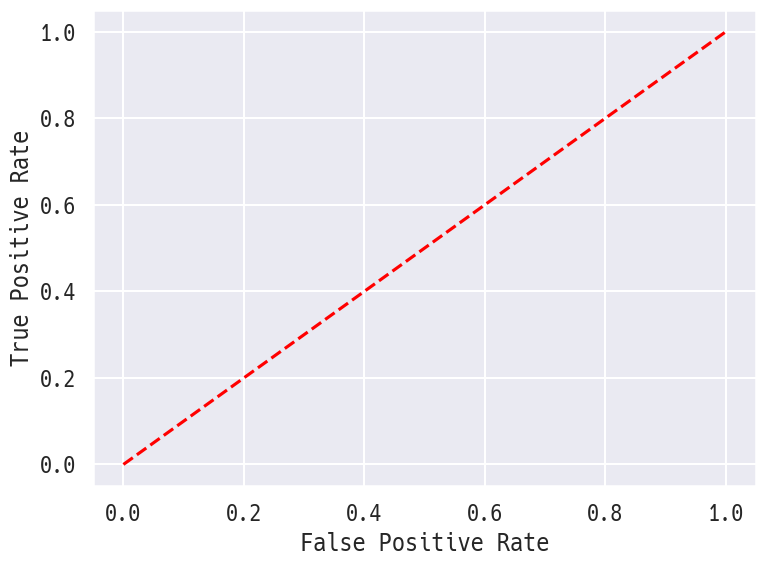

In [183]:
# # plot_roc_curveでfpr, tprの変化をプロットする
# fig, axes = plt.subplots(figsize=(8, 6), tight_layout=True)
# # plot_roc_curve(model, X_test, y_test, marker="o", markersize=5, ax=axes)
# axes.set_xlabel("False Positive Rate")
# axes.set_ylabel("True Positive Rate")
# sns.lineplot(x=[0, 1], y=[0, 1], color="red", linestyle="--", ax=axes)
# plt.show()

In [ ]:
# fpr = fp / (tn + fp)　真にネガティブであるものの中で、ネガティブと予測されたものの割合
# tpr = tp / (tp + fn)　真にポジティブであるものの中で、ポジティブと予測されたものの割合

In [186]:
# roc_curveを用いてfpr, tpr, thresholdの値を求める
fpr, tpr, threshold = roc_curve(y_test, prob[:, 1])

In [187]:
# aucの算出
auc(fpr, tpr)

0.9592581775700935

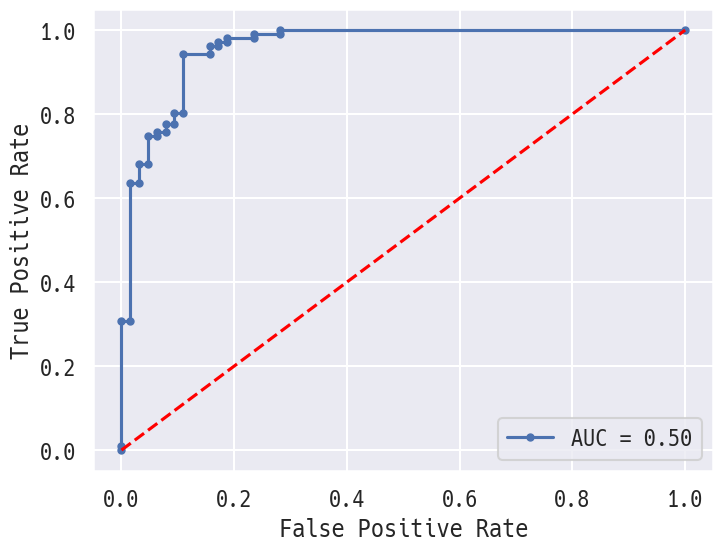

In [188]:
from sklearn.metrics import RocCurveDisplay

fig, axes = plt.subplots(figsize=(8, 6))

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, fpr))
# fpt, tprはすでに取得済み
# roc_aucにはauc(area under curve, すでに計算済み)を指定する

display.plot(marker="o", markersize=5, ax=axes)

axes.set_xlabel("False Positive Rate")
axes.set_ylabel("True Positive Rate")
sns.lineplot(x=[0, 1], y=[0, 1], color="red", linestyle="--", ax=axes)

plt.show()

In [189]:
# (1, 0)からの距離が最大になるfpr,tprの組を求める
np.max((fpr - 1) ** 2 + tpr**2)

1.6842077373365032

In [190]:
# そのインデックスを求める
np.argmax((fpr - 1) ** 2 + tpr**2)

16

In [196]:
# そのthresholdを求める
precision[16], recall[16], threshold[16]

(0.6903225806451613, 1.0, 0.6317710503896633)

In [192]:
# ROCカーブ理解のためのプロットを作っていく
np.random.seed(17)
pos = np.random.randn(1000) + 1.5
neg = np.random.randn(1000) - 1.5
neg2 = np.random.randn(1000) - 7
neg3 = np.random.randn(900) + 1.5

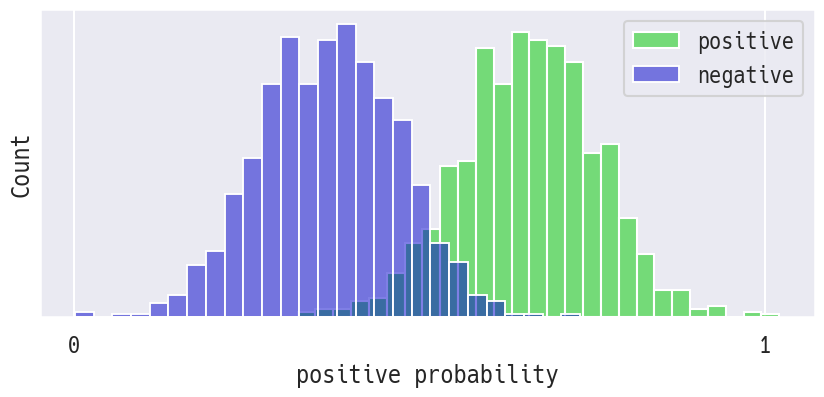

In [193]:
# あるモデルによりポジティブである確率を求めた
# 中央付近では確率が高くても実際にはネガティブ、低くてもポジティブなものが混在する
plt.figure(figsize=(10, 4))
sns.histplot(pos, color="#0c0", alpha=0.5, label="positive")
sns.histplot(neg, color="#00c", alpha=0.5, label="negative")
plt.legend()
plt.xticks([-5.2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel("positive probability")
plt.show()
# 閾値を中央付近にあると、バーの重なる部分が FP, FN になる

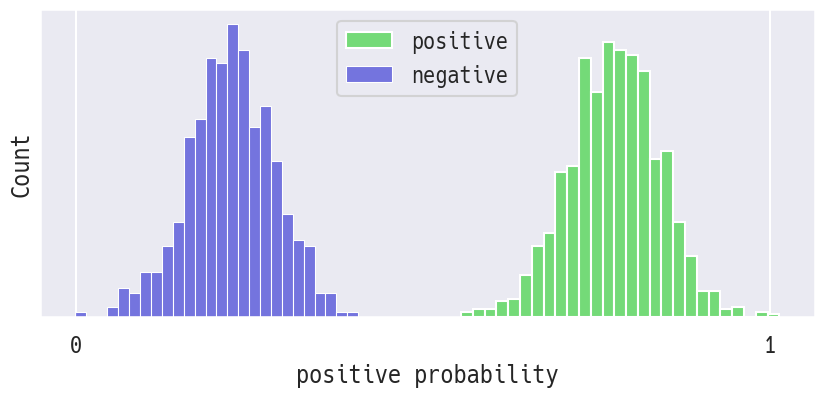

In [194]:
# このモデルでは100％の精度で分離することができている
plt.figure(figsize=(10, 4))
sns.histplot(pos, color="#0c0", alpha=0.5, label="positive")
sns.histplot(neg2, color="#00c", alpha=0.5, label="negative")
plt.legend()
plt.xticks([-10.5, 5], [0, 1])
plt.yticks([], [])
plt.xlabel("positive probability")
plt.show()
# ある閾値でははっきりと0：1に分かれる

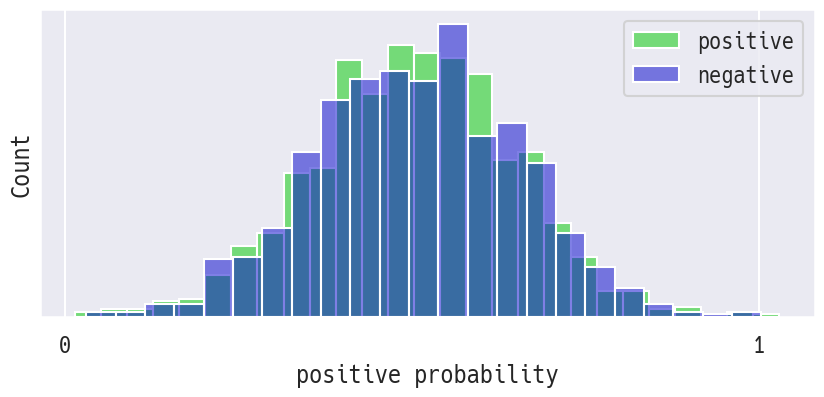

In [195]:
## ランダム（無作為）な確率をそれぞれに与える場合、どの確率においてもポジティブ、ネガティブの割合は一定
plt.figure(figsize=(10, 4))
sns.histplot(pos, color="#0c0", alpha=0.5, label="positive")
sns.histplot(neg3, color="#00c", alpha=0.5, label="negative")
plt.legend()
plt.xticks([-2, 5], [0, 1])
plt.yticks([], [])
plt.xlabel("positive probability")
plt.show()
# 閾値を下げていくとTPRが上がり、同じ割合でFPRも上がっていく
# 結果として直線になると考えることができる

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---